# Training Reference by Yolov8

[![My Skills](https://skillicons.dev/icons?i=github)](https://github.com/rujisaranmalan/Playing-Cards-Detection.git) 
##### Google Colab : https://colab.research.google.com/drive/1muD6Xzu11rw_en0kkPIM9-aZtlXaaSKT?usp=sharing
### Steps in this Tutorial

In this tutorial:

- Before you start
- Install YOLOv8
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy it on Jetson Device
**Let's begin!**

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu May 25 08:41:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Next we import os so that we can create or remove the file.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

We install by using !pip install ultralytics and check if it is installed or not.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

We already create the dataset in the Roboflow so we will skip this part. or you can see this document : "https://docs.roboflow.com/adding-data"




We make a directory name 'HOME' and use function !pip install roboflow so that we can import our labelized datasets.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="iu2x3rAOfACxzeU1N4qp")
project = rf.workspace("kmitl-kln1o").project("playingcardsdetection-new-4uooq")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to PlayingCardsDetection-New-2 in yolov8:: 100%|██████████| 2032/2032 [00:00<00:00, 2775.22it/s]


## Custom Training

1. Use model yolov8s (fast and high accuracy)
2. Located the datasets location.
3. Epoch = 80
4. Image size = 640

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=80 imgsz=640 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/PlayingCardsDetection-New-2/data.yaml, epochs=80, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

## List if the training create our file

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch3150.jpg
events.out.tfevents.1685004246.144c84b4dddf.2008.0  train_batch3151.jpg
F1_curve.png					    train_batch3152.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


## Show the confusion Matrix and graph to view the performance of our training model.

/content


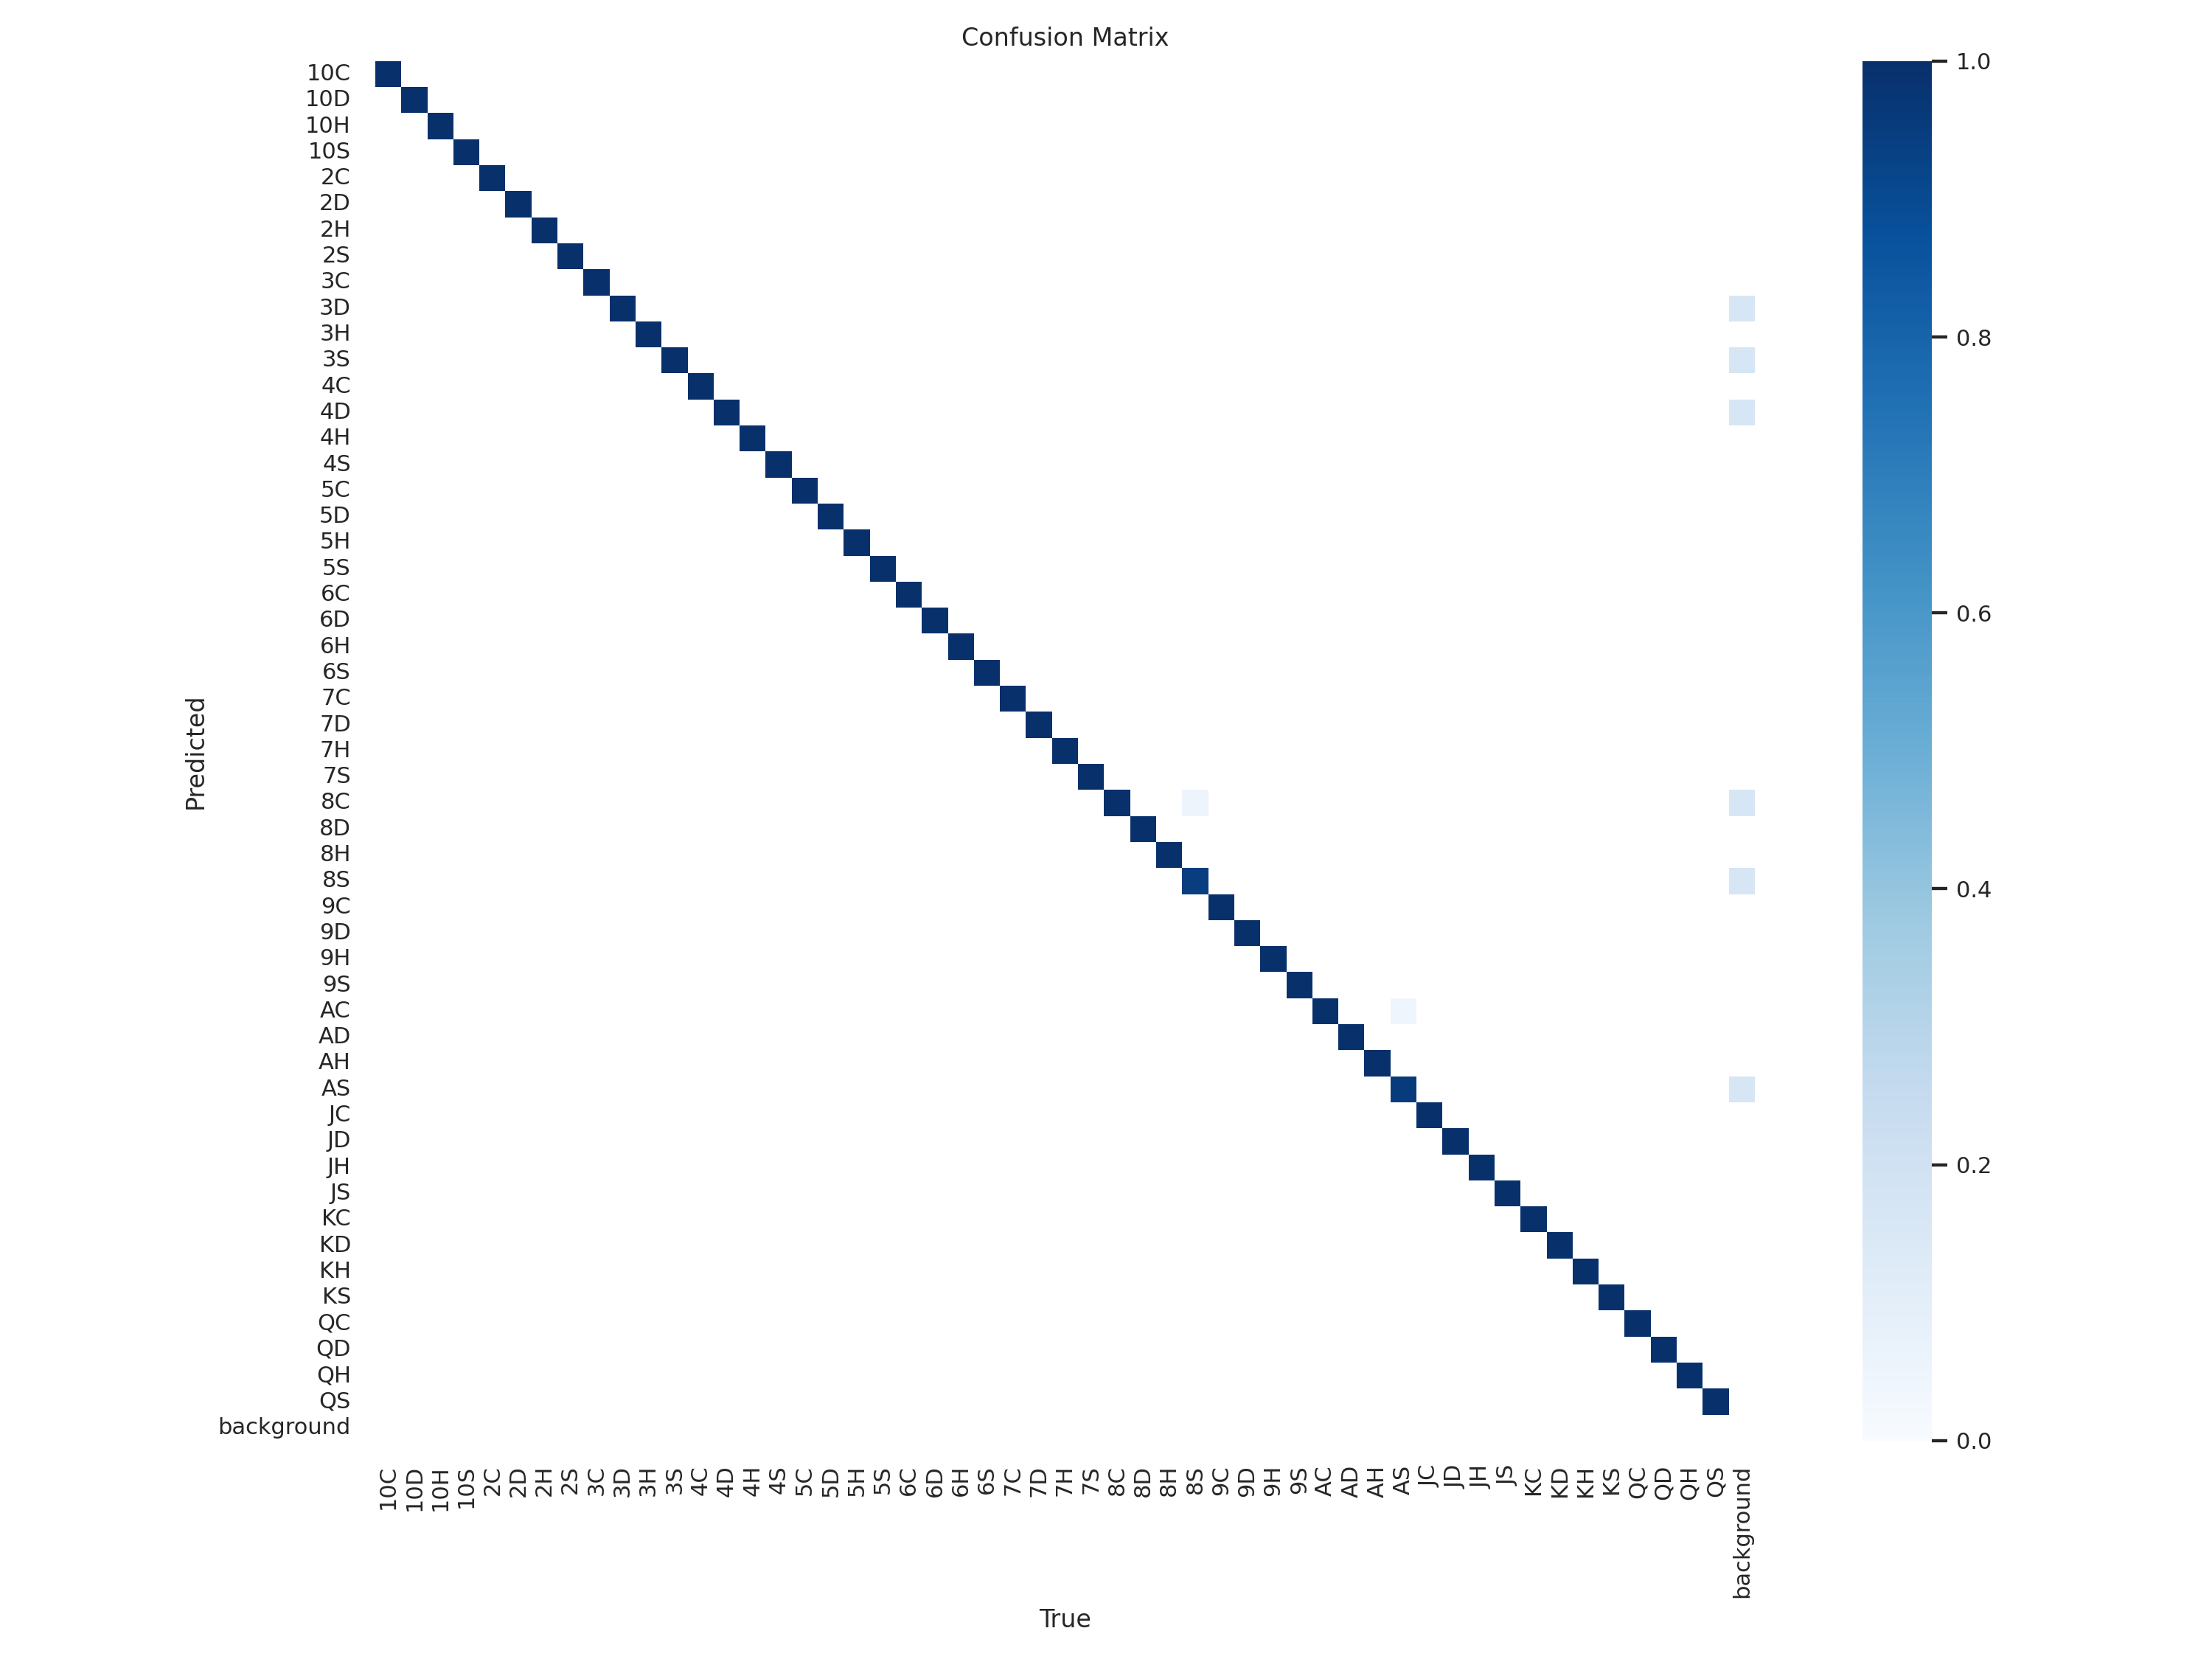

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


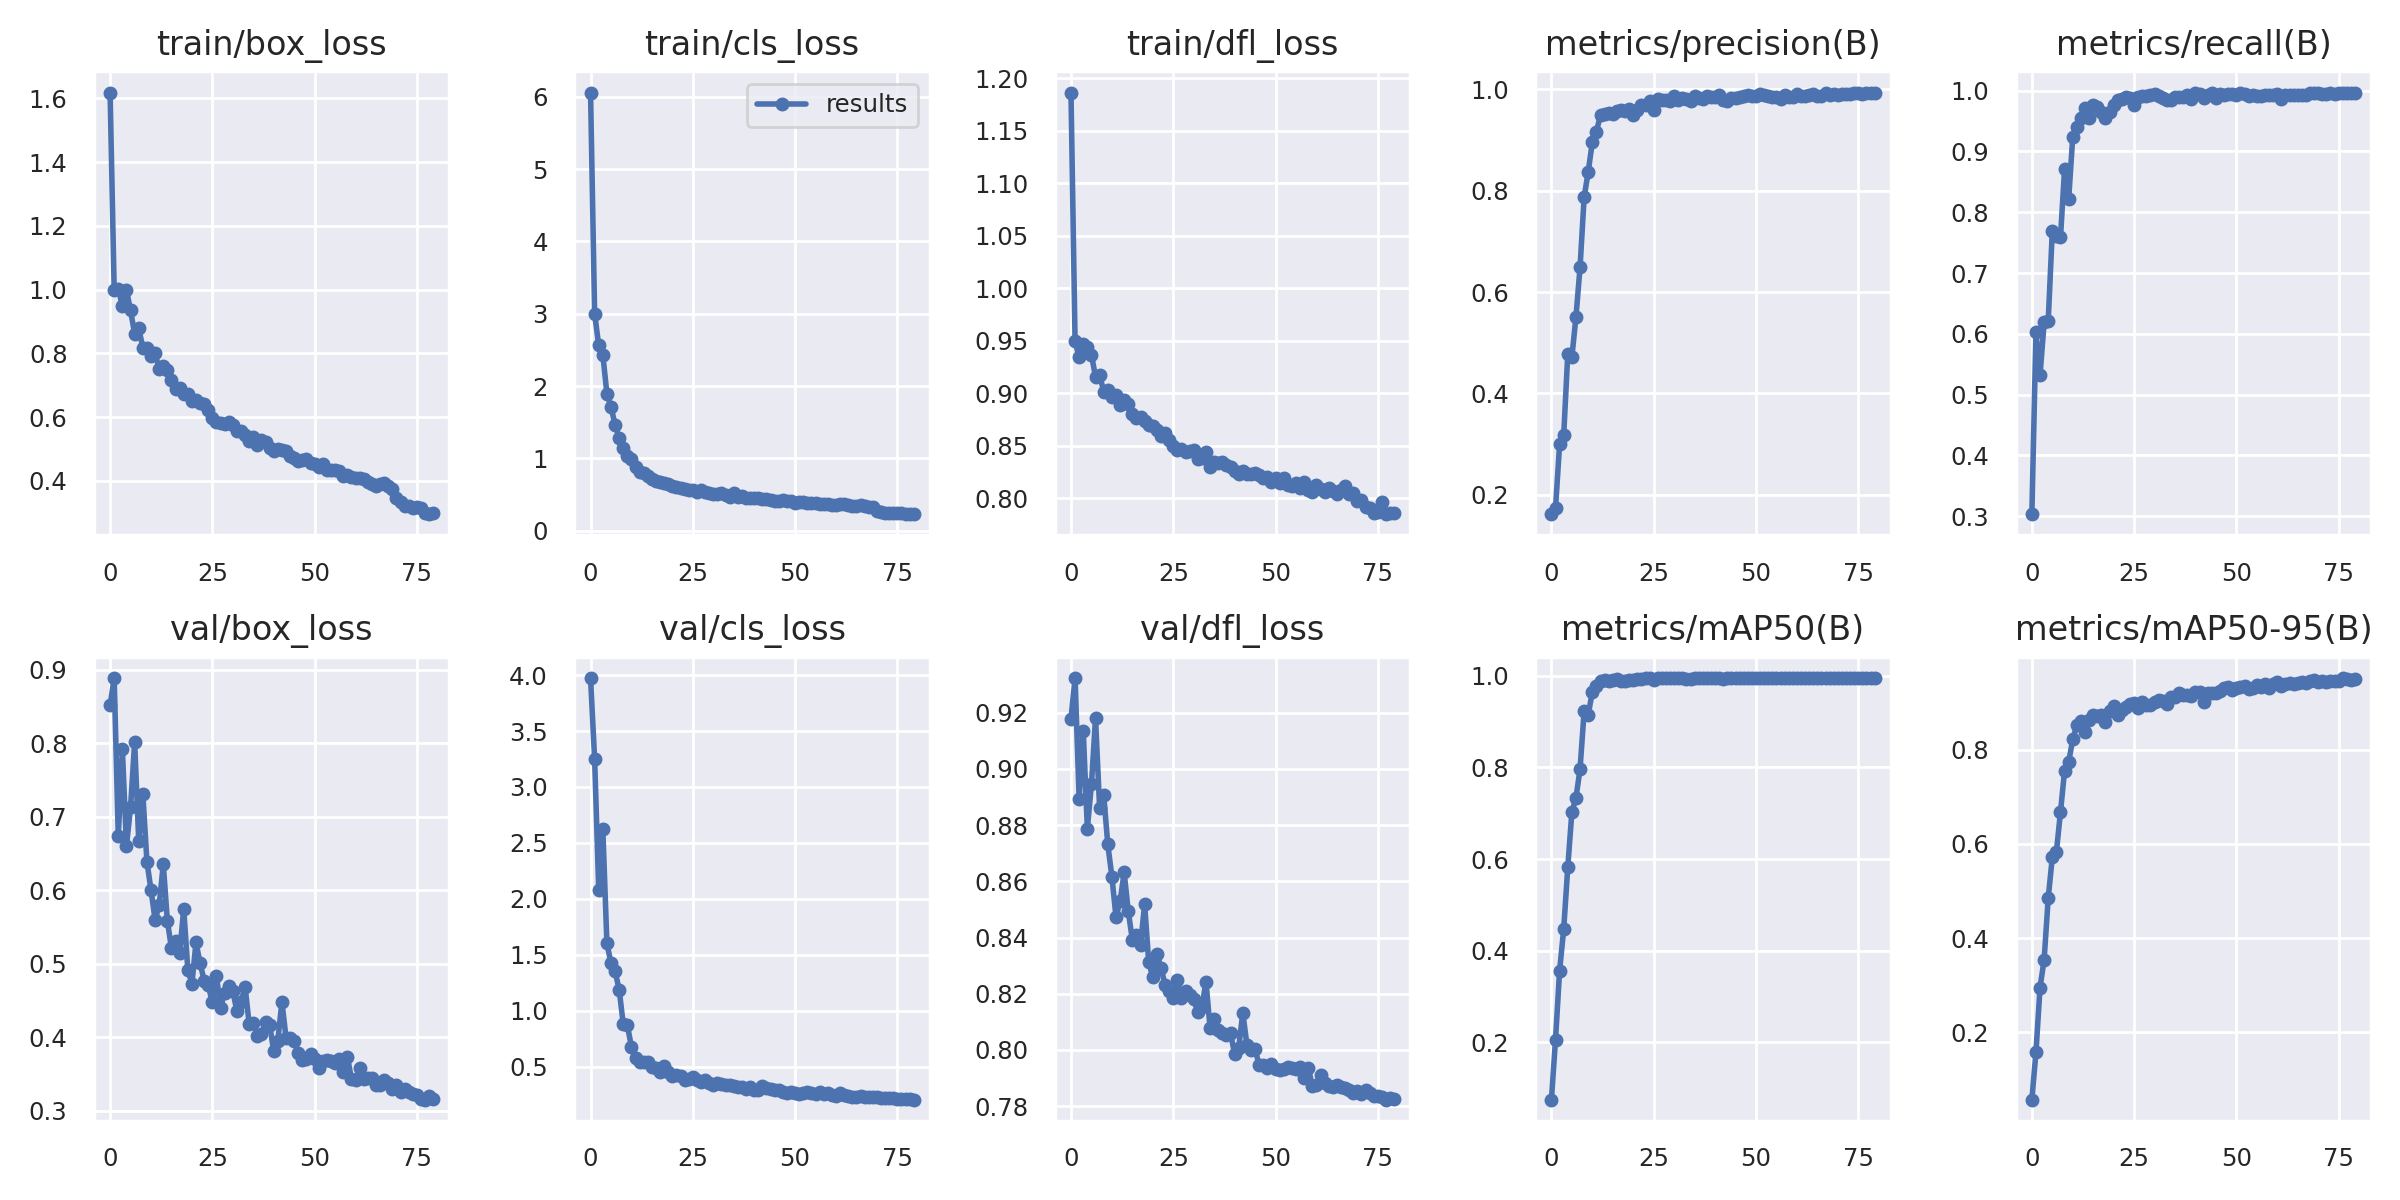

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

### Test our model on examples

/content


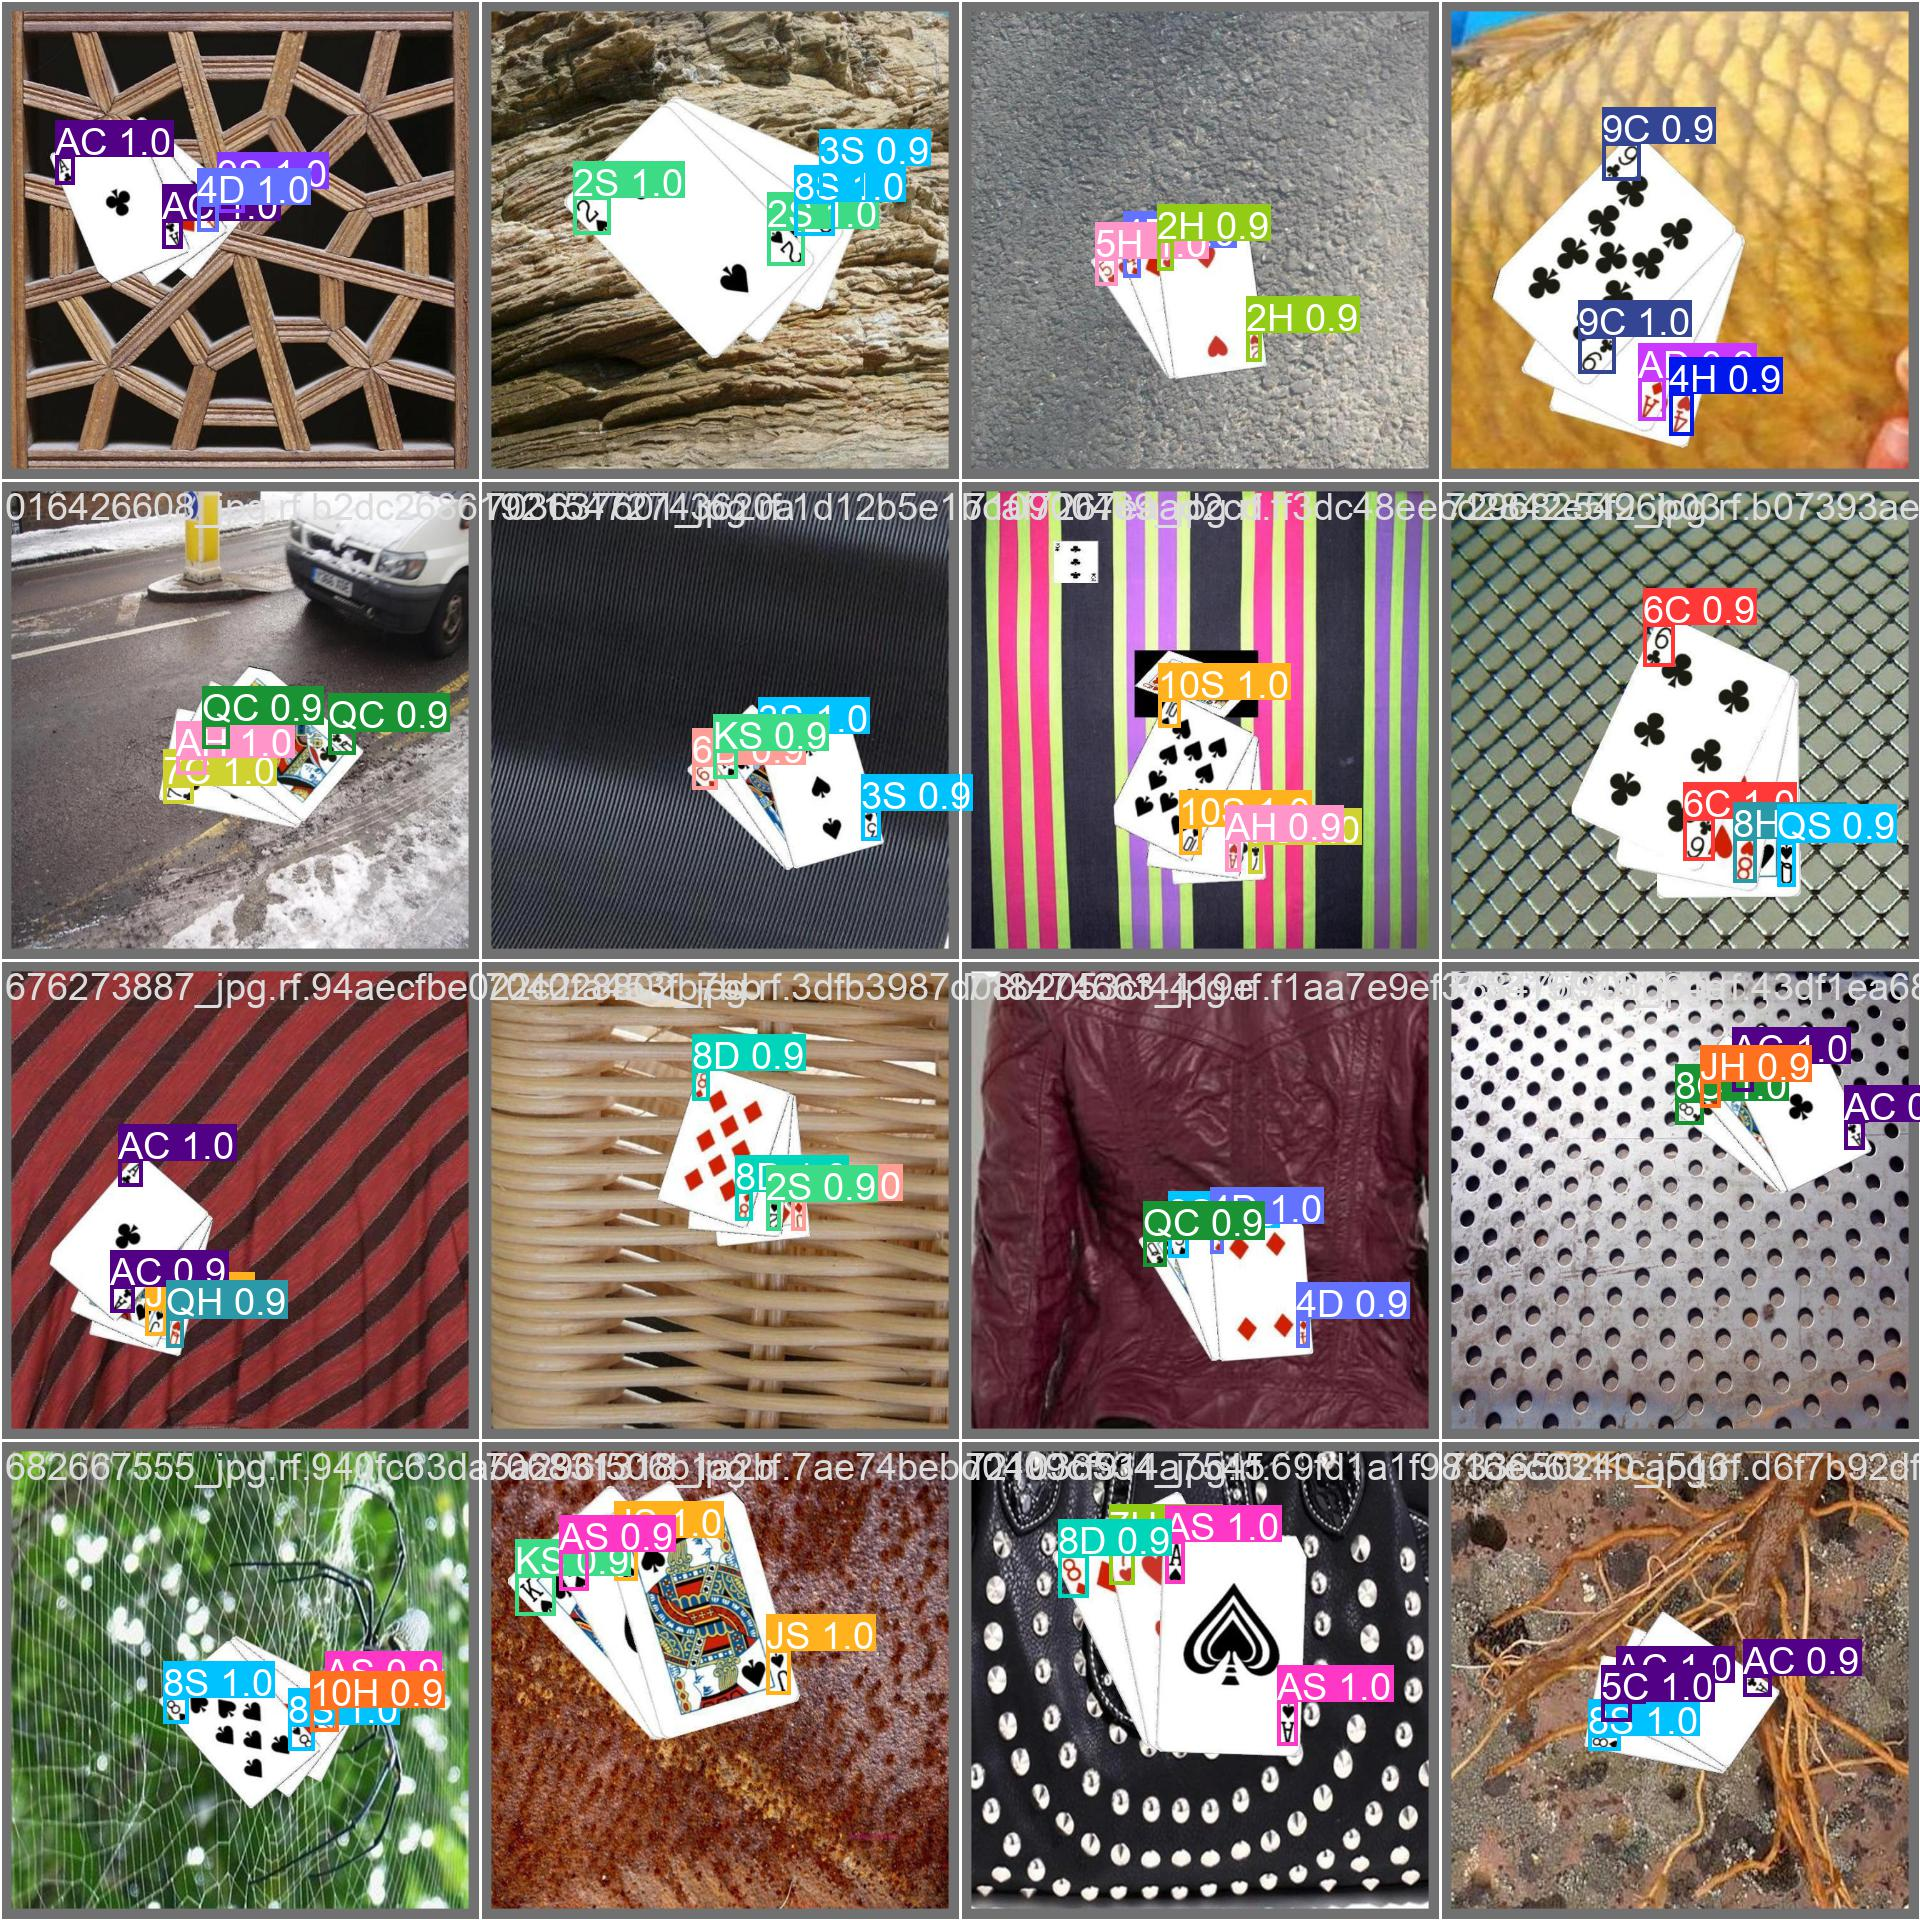

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-25 09:26:36.098668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 09:26:36.954014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/PlayingCardsDetection-New-2/valid/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100% 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:07<00:00,  1.69it/s]
                   all        202        808      0.991      0.997      0.995      0.954
                   10C

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-25 09:31:54.768948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 09:31:55.876209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11145708 parameters, 0 gradients, 28.5 GFLOPs
image 1/101 /content/datasets/PlayingCardsDetection-New-2/test/images/007044536_jpg.rf.ecbfec1ce4cadc959050379608c8cc34.jpg: 640x640 1 QC, 1 QH, 2 QSs, 16.4ms
image 2/101 /content/datasets/PlayingCardsDetection-New-2/test/images/008605280_jpg.rf.8fb323d8da5116df6b9d42fde58fa043.jpg: 640x640 1 2C, 1 KS, 2 QSs, 16.4ms
image 3/101 /content/datasets/PlayingCardsDetection-New-2/test/images

**NOTE:** Let's take a look at few results.

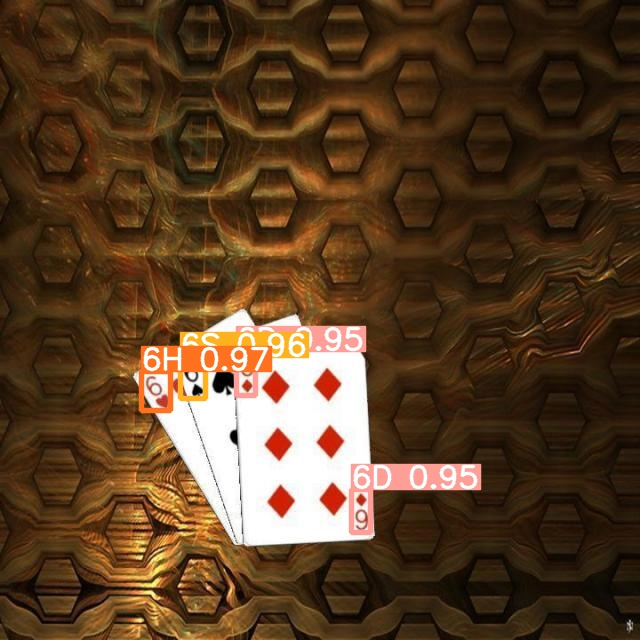

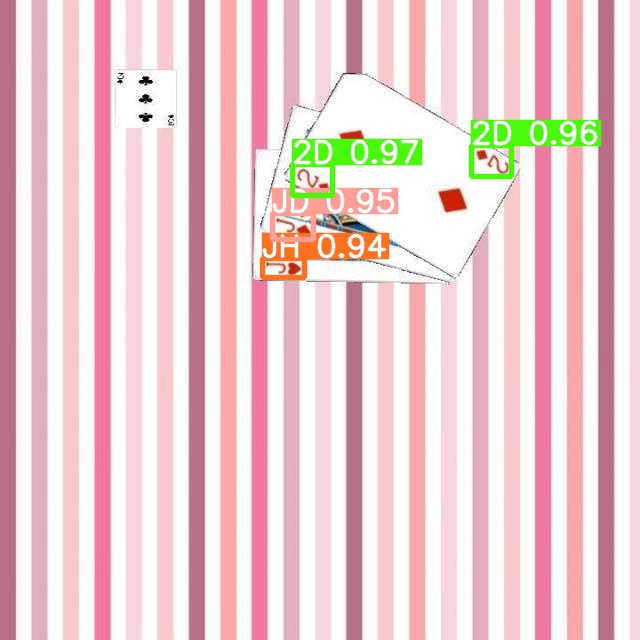

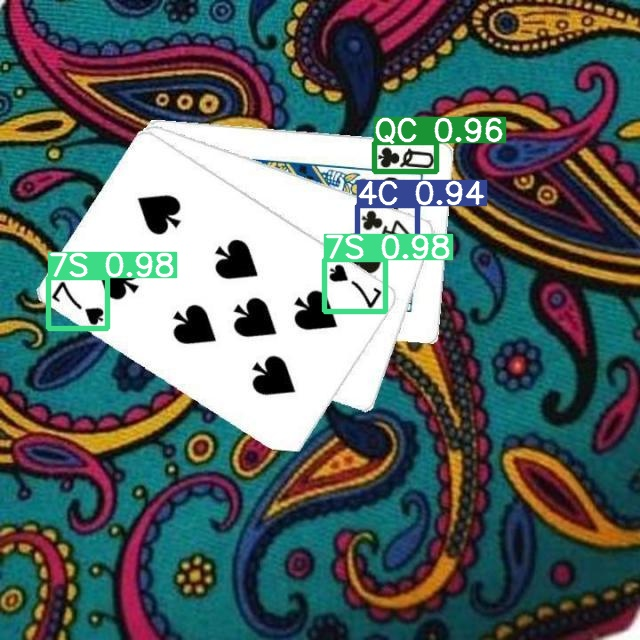

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. 

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/kmitl-kln1o/playingcardsdetection-new-4uooq/deploy/2
Share your model with the world at: https://universe.roboflow.com/kmitl-kln1o/playingcardsdetection-new-4uooq/model/2


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 795697834_jpg.rf.d9f67ea1a074962036befe1ed36ac0bc.jpg


{'predictions': [{'x': 155.5,
   'y': 391.0,
   'width': 29.0,
   'height': 38.0,
   'confidence': 0.9647262096405029,
   'class': '6H',
   'image_path': '/content/datasets/PlayingCardsDetection-New-2/test/images/795697834_jpg.rf.d9f67ea1a074962036befe1ed36ac0bc.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 192.5,
   'y': 377.5,
   'width': 25.0,
   'height': 41.0,
   'confidence': 0.9626566171646118,
   'class': '6S',
   'image_path': '/content/datasets/PlayingCardsDetection-New-2/test/images/795697834_jpg.rf.d9f67ea1a074962036befe1ed36ac0bc.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 245.5,
   'y': 373.0,
   'width': 19.0,
   'height': 44.0,
   'confidence': 0.9506372213363647,
   'class': '6D',
   'image_path': '/content/datasets/PlayingCardsDetection-New-2/test/images/795697834_jpg.rf.d9f67ea1a074962036befe1ed36ac0bc.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 360.5,
   'y': 510.5,
   'width': 19.0,
   'height': 43.0,
   'confidence'

#### The main part is that we have to deploy our training weight('best.pt') into our jetson colab so we have to download it and upload into Jetson device

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deploy to our Jetson Device

## Don't forget to upload our best.pt file to Jetson Terminal and Input the following code. 

### Install the required packages.

In [ ]:
!sudo apt update
!sudo apt install -y python3.8 python3.8-venv python3.8-dev python3-pip \
!libopenmpi-dev libomp-dev libopenblas-dev libblas-dev libeigen3-dev libcublas-dev

### Clone the YOLOv8 repository.

In [ ]:
!python3.8 -m venv venv
!source venv/bin/activate

### Create a Python 3.8 virtual environment using venv.

In [ ]:
!python3.8 -m venv venv
!source venv/bin/activate

### Update Python packages not specified in YOLOv8.

In [ ]:
!pip install -U pip wheel gdown

### Download and install the pre-built PyTorch, TorchVision package. This package was built using the method described in this article. This article also uses the pre-built package.

In [ ]:
# pytorch 1.11.0
!gdown https://drive.google.com/uc?id=1hs9HM0XJ2LPFghcn7ZMOs5qu5HexPXwM
# torchvision 0.12.0
!gdown https://drive.google.com/uc?id=1m0d8ruUY8RvCP9eVjZw4Nc8LAwM8yuGV
!python3.8 -m pip install torch-*.whl torchvision-*.whl

### Install the Python package for YOLOv8. (This will run setup.py)

In [ ]:
!pip install .

### Execute object detection.

In [ ]:
!yolo task=detect mode=predict model=best.pt source=0 show=True